# Pandas
-----
## 04. 데이터 그룹화 및 집계
### EDA (Exploratory Data Analysis)
   - 데이터를 이해하기 위한 탐색적 분석
   - 데이터의 특징과 내재하는 구조적 관계를 알아내는 과정
   - CDA (Confirmatory Data Analysis)와 대비되는 방법론
### 데이터그룹화
   - 데이터를 특정 기준에 따라 논리적으로 나누는 작업
   - 특정 열의 값이 동일한 행들을 하나의 그룹으로 묶음
   - groupby() 메서드를 사용하여 그룹화 수행
   - 그룹화 후 각 그룹에 대해 집계 함수를 적용하여 요약 통계 정보 계산 가능
   - 멀티 인덱스를 사용하여 여러 기준에 따라 복수 개의 열을 기준으로 그룹화 가능
   - 그룹화를 통해 원하는 데이터를 필터링하거나 변환할 수 있음

In [1]:
import pandas as pd

# gapminder.tsv 파일을 읽어서 데이터프레임으로 변환
df = pd.read_csv('../data/gapminder.tsv', sep='\t')
print(df)

# 불러온 데이터프레임의 앞쪽 데이터를 확인
# df.head()
# df.head(10)
df.head(n=10)

# 불러온 데이터프레임의 뒤쪽 데이터를 확인
df.tail()

# 데이터프레임의 형태 확인
df.shape

# 데이터프레임에 포함된 컬럼 이름 확인
df.columns

# 각 컬럼의 자료형 확인
df.dtypes

# 데이터프레임의 전반적 정보 확인
df.info()

# 데이터프레임의 기술 통계 정보 확인
df.describe()

          country continent  year  lifeExp       pop   gdpPercap
0     Afghanistan      Asia  1952   28.801   8425333  779.445314
1     Afghanistan      Asia  1957   30.332   9240934  820.853030
2     Afghanistan      Asia  1962   31.997  10267083  853.100710
3     Afghanistan      Asia  1967   34.020  11537966  836.197138
4     Afghanistan      Asia  1972   36.088  13079460  739.981106
...           ...       ...   ...      ...       ...         ...
1699     Zimbabwe    Africa  1987   62.351   9216418  706.157306
1700     Zimbabwe    Africa  1992   60.377  10704340  693.420786
1701     Zimbabwe    Africa  1997   46.809  11404948  792.449960
1702     Zimbabwe    Africa  2002   39.989  11926563  672.038623
1703     Zimbabwe    Africa  2007   43.487  12311143  469.709298

[1704 rows x 6 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   coun

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [2]:
# year 열을 기준으로 데이터 그룹화, 연도별 groupby 객체 생성
grouped_year_df = df.groupby('year')
# grouped_year_df.head()
# type(grouped_year_df)
# 그룹화한 데이터프레임의 기술 통계 정보 확인
# df.describe()
grouped_year_df.describe()

# 그룹화한 데이터프레임에서 lifeExp 열만 추출하여 평균값 계산
grouped_year_df['lifeExp'].mean()

# year로 그룹화한 데이터프레임에서 lifeExp만 추출하여 평균값 계산
life_exp_df = df.groupby('year')['lifeExp'].mean()
life_exp_df

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

### 데이터프레임의 시각화
   - 데이터의 시각화는 데이터를 이해하는 데 매우 중요한 단계
   - 데이터프레임의 plot() 메서드를 사용하여 그래프 생성 가능
      - 다양한 종류의 그래프를 지원
        - 선 그래프, 막대 그래프, 히스토그램, 산점도 등
      - 내부적으로 Matplotlib를 사용하여 데이터를 그래프로 그려줌

#### plot 메서드의 주요 매개변수
- 기본 설정 및 데이터 지정
    - kind : 그래프 유형 지정 (예: 'line', 'bar', 'scatter' 등)
    - x : x축에 사용할 데이터 열 이름 또는 값
    - y : y축에 사용할 데이터 열 이름 또는 값
- 그래프 레이블 관련
    - title : 그래프 제목을 설정
    - xlabel : x축의 레이블을 설정
    - ylabel : y축의 레이블을 설정
    - xlim : x 축의 범위를 지정 (예: [xmin, xmax])
    - ylim : y 축의 범위를 지정 (예: [ymin, ymax])
    - grid : 축의 그리드를 표시할 지 여부를 지정 (기본값: False)
    - legend : 범례를 그릴 지 여부를 지정 (기본값: False)
    - color : 그래프의 색상을 지정 (기본값: 라인 플롯: None, 막대 그래프: 'b')
    - style : 라인 플롯 스타일을 지정 (예: 'o-', '--', 's-', 'k:')
    - subplots : 각 열을 개별 서브플롯으로 그릴지 여부를 지정합니다.

<Axes: title={'center': 'Life Expectancy Trends (By Year)'}, xlabel='year', ylabel='Life Expectancy'>

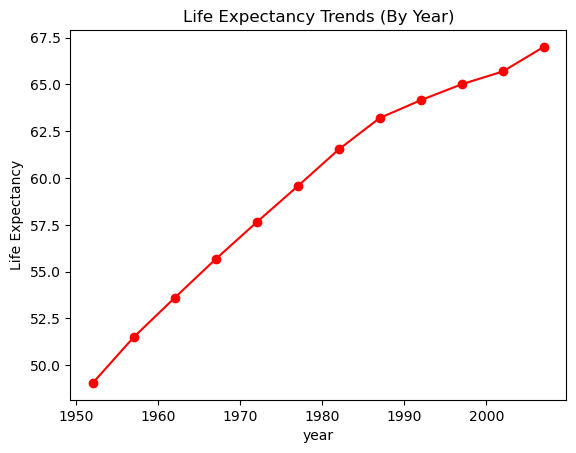

In [3]:
%matplotlib inline
# life_exp_df.plot()
life_exp_df.plot(kind='line',
                 x='year',
                 y='lifeExp',
                 title='Life Expectancy Trends (By Year)',
                 ylabel='Life Expectancy',
                 color='red',
                 style="o-",)

#### [연습]
- gapminder 데이터셋을 이용, 연도별, 대륙별 그룹화 수행
- 그룹화된 데이터셋에서 gdpPercap 열만 추출하여 gdpPerCap의 평균값을 계산
- Plot으로 출력 

In [4]:
%matplotlib inline
import pandas as pd

df = pd.read_csv('../data/gapminder.tsv', sep='\t')

grouped_df = df.groupby(["year", "continent"])
# grouped_df.describe()
gdp_summary = grouped_df['gdpPercap'].mean()
gdp_summary

year  continent
1952  Africa        1252.572466
      Americas      4079.062552
      Asia          5195.484004
      Europe        5661.057435
      Oceania      10298.085650
1957  Africa        1385.236062
      Americas      4616.043733
      Asia          5787.732940
      Europe        6963.012816
      Oceania      11598.522455
1962  Africa        1598.078825
      Americas      4901.541870
      Asia          5729.369625
      Europe        8365.486814
      Oceania      12696.452430
1967  Africa        2050.363801
      Americas      5668.253496
      Asia          5971.173374
      Europe       10143.823757
      Oceania      14495.021790
1972  Africa        2339.615674
      Americas      6491.334139
      Asia          8187.468699
      Europe       12479.575246
      Oceania      16417.333380
1977  Africa        2585.938508
      Americas      7352.007126
      Asia          7791.314020
      Europe       14283.979110
      Oceania      17283.957605
1982  Africa        2481

In [5]:
gdp_summary.unstack()
# unstack() 옆으로 풀린다.

continent,Africa,Americas,Asia,Europe,Oceania
year,,,,,
1952,1252.572466,4079.062552,5195.484004,5661.057435,10298.085650
1957,1385.236062,4616.043733,5787.732940,6963.012816,11598.522455
1962,1598.078825,4901.541870,5729.369625,8365.486814,12696.452430
1967,2050.363801,5668.253496,5971.173374,10143.823757,14495.021790
1972,2339.615674,6491.334139,8187.468699,12479.575246,16417.333380
1977,2585.938508,7352.007126,7791.314020,14283.979110,17283.957605
1982,2481.592960,7506.737088,7434.135157,15617.896551,18554.709840
1987,2282.668991,7793.400261,7608.226508,17214.310727,20448.040160
1992,2281.810333,8044.934406,8639.690248,17061.568084,20894.045885


<Axes: title={'center': 'GDP per Capita Trends (By Year)'}, xlabel='Year'>

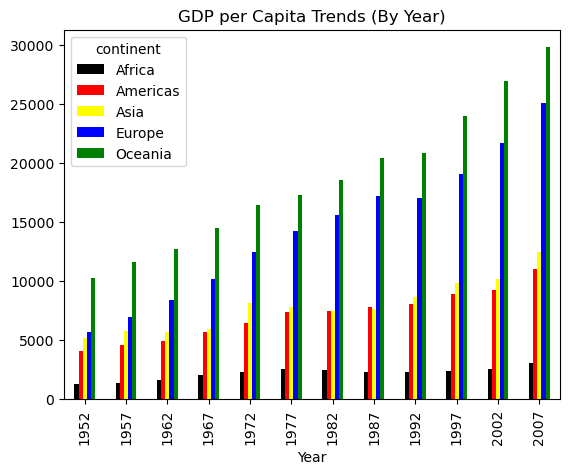

In [6]:
gdp_summary.unstack().plot(kind='bar',
                 # figsize=(10, 10),
                 title='GDP per Capita Trends (By Year)',
                 # ylabel='GDP per Capita',
                 xlabel='Year',
                 color=['black', 'red', 'yellow', 'blue', 'green'],
                 legend=True)

### Pivot Table
#### 피봇 테이블 개요
- 데이터프레임의 데이터를 재구성하여 데이터에 대한 통계를 한눈에 파악할 수 있도록 정리한 표
- 데이터 분석과 정보 관리에서 중요한 도구
    - 엑셀 등 스프레드시트 프로그램에서 자주 사용
    - 대량의 데이터를 빠르게 정리하고 그룹화 할 수 있으며, 사용자의 필요에 따라 데이터를 분석하고 합계, 평균, 최대, 최소값 등을 계산할 수 있음
- 데이터를 효과적으로 정리하고 분석하는 데 있어 매우 강력한 도구로, 재무, 판매, 마케팅 등 다양한 분야에서 활용

#### 피봇 테이블의 주요 기능
1. 정렬과 그룹화: 특정 열 또는 행을 기준으로 데이터를 정렬하거나 그룹화하여 요약할 수 있음
2. 집계 함수 사용: SUM, AVERAGE, COUNT 등의 집계 함수를 사용하여 데이터를 요약할 수 있음
3. 데이터 필터링: 특정 조건을 적용하여 데이터를 필터링하고 분석할 수 있음
4. 드릴 다운 및 드릴 업: 데이터의 다른 레벨로 들어가 세부 정보를 확인하거나 요약된 정보로 돌아갈 수 있음

#### 피봇 테이블 작성 과정
1. 데이터 선택: 분석하고자 하는 데이터 범위를 선택합니다.
2. 피봇 테이블 생성: 대부분의 스프레드시트 프로그램에서는 특별한 메뉴 또는 버튼을 통해 피봇 테이블을 생성할 수 있습니다.
3. 행 및 열 선택: 특정 열을 행 또는 열에 배치하여 데이터를 그룹화합니다.
4. 값 및 집계 함수 선택: 특정 열의 값을 분석하고, 원하는 집계 함수를 선택합니다.
5. 필터 적용 (선택 사항): 원하는 조건에 맞게 데이터를 필터링할 수 있습니다.

### 피봇 테이블의 구성 요소
- 행 (또는 인덱스): 피봇 테이블의 왼쪽에 위치하며, 행에 있는 데이터를 기준으로 피봇 테이블의 데이터가 그룹화됨
- 열: 피봇 테이블의 위쪽에 위치하며, 열에 있는 데이터를 기준으로 피봇 테이블의 데이터가 그룹화됨
- 값: 집계 함수를 적용할 데이터
- 집계 함수: 데이터를 집계하는 데 사용되는 함수
- 필터 (선택사항): 원하는 조건에 맞게 데이터를 필터링할 수 있음

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
plt.rcParams["font.family"] = 'D2Coding'

df = pd.read_csv('../data/household_accounts.csv')
df


,날짜,카테고리,금액
0,2023-01-01,마트,97300
1,2023-01-01,데이트,114600
2,2023-01-01,운동,84900
3,2023-01-01,기부,29800
4,2023-01-02,대중교통,1500
...,...,...,...
538,2023-06-29,기부,19700
539,2023-06-29,외식,35600
540,2023-06-30,병원,98700
541,2023-06-30,자동차,115500


In [8]:
df.dtypes

날짜      object
카테고리    object
금액       int64
dtype: object

In [9]:
# print(df["날짜"].dtype)
df['날짜'] = pd.to_datetime(df['날짜'])
df.set_index("날짜", inplace=True)  # set_index인덱스로 만들어서 쓸 거임 
# inplace=True 면 실제 데이터 프레임을 변경한다. 
df

,카테고리,금액
날짜,,
2023-01-01,마트,97300
2023-01-01,데이트,114600
2023-01-01,운동,84900
2023-01-01,기부,29800
2023-01-02,대중교통,1500
...,...,...
2023-06-29,기부,19700
2023-06-29,외식,35600
2023-06-30,병원,98700


In [10]:
# 피봇 테이블 생성
pivot_df = df.pivot_table(index='날짜', 
                          columns='카테고리', 
                          values='금액', 
                          aggfunc='sum',
                          fill_value=0)   

# fill_value=0 비어있는 값은 0으로 채운다.

pivot_df

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,보험료,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비
날짜,,,,,,,,,,,,,,,,,,,,
2023-01-01,0,0,0,29800,0,114600,97300,0,0,0,0,0,0,0,0,84900,0,0,0,0
2023-01-02,0,0,0,0,4300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-01-03,0,0,0,0,0,135600,0,0,0,64400,0,0,0,0,0,0,290200,23600,0,0
2023-01-04,48200,0,61900,0,0,0,0,0,0,0,0,85700,0,0,48900,0,0,9000,0,0
2023-01-05,0,0,71000,0,0,0,0,0,0,49100,255500,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-26,0,0,79500,29700,0,0,59400,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-27,0,0,0,0,0,114900,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2023-06-28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23800,0,0,0,0,0


In [11]:
pivot_df_monthly = pivot_df.resample('M').sum()
pivot_df_monthly
# 월별 집계 확인 

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,보험료,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비
날짜,,,,,,,,,,,,,,,,,,,,
2023-01-31,262500,309300,626900,238700,15700,327800,314300,27900,205500,615800,255500,537200,147400,1771500,250900,293500,956500,267800,65100,18600
2023-02-28,208200,309300,415800,185200,10600,132900,127500,27900,193100,367100,255500,472100,488200,0,161500,110200,1354600,289500,65100,18600
2023-03-31,251900,309300,701400,185200,13200,745700,235600,27900,315100,725100,255500,663400,489100,0,224900,389100,532900,370800,65100,18600
2023-04-30,107800,309300,461300,47100,16000,786400,303100,27900,75900,816100,255500,189700,702500,1223600,28600,206600,1139900,325100,65100,18600
2023-05-31,330800,309300,335500,83000,13100,579400,365400,27900,550200,479000,255500,364500,412200,0,95000,329400,829600,290900,65100,18600
2023-06-30,323100,309300,346200,175200,12500,466900,355500,27900,115700,661900,255500,318100,513900,0,209100,248200,1009100,246400,65100,18600


In [12]:
pivot_df_monthly.index =pivot_df_monthly.index.to_period('M')
pivot_df_monthly
# index정보를 to_period 월단위로 변환

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,보험료,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비
날짜,,,,,,,,,,,,,,,,,,,,
2023-01,262500,309300,626900,238700,15700,327800,314300,27900,205500,615800,255500,537200,147400,1771500,250900,293500,956500,267800,65100,18600
2023-02,208200,309300,415800,185200,10600,132900,127500,27900,193100,367100,255500,472100,488200,0,161500,110200,1354600,289500,65100,18600
2023-03,251900,309300,701400,185200,13200,745700,235600,27900,315100,725100,255500,663400,489100,0,224900,389100,532900,370800,65100,18600
2023-04,107800,309300,461300,47100,16000,786400,303100,27900,75900,816100,255500,189700,702500,1223600,28600,206600,1139900,325100,65100,18600
2023-05,330800,309300,335500,83000,13100,579400,365400,27900,550200,479000,255500,364500,412200,0,95000,329400,829600,290900,65100,18600
2023-06,323100,309300,346200,175200,12500,466900,355500,27900,115700,661900,255500,318100,513900,0,209100,248200,1009100,246400,65100,18600


<Axes: title={'center': '월별 지출 현황'}, xlabel='월', ylabel='지출액'>

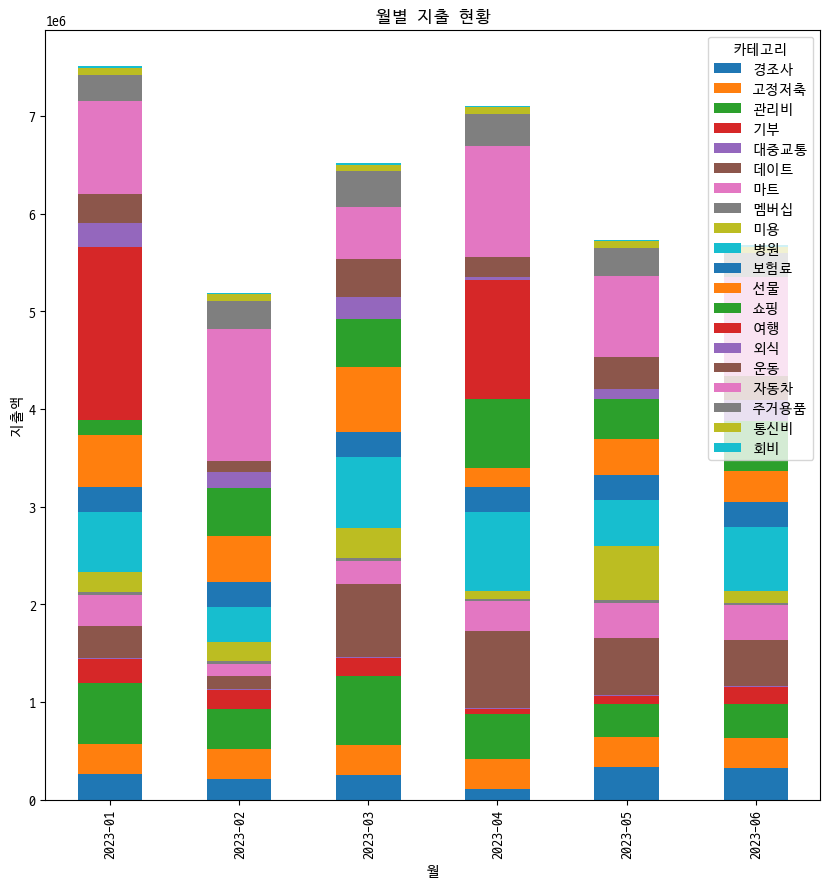

In [13]:
pivot_df_monthly.plot(kind='bar',
                      stacked=True, # 데이터 위로 쌓기
                      figsize=(10, 10),  # 사이즈 지정
                      title='월별 지출 현황',
                      xlabel='월',
                      ylabel='지출액',
                      legend=True)  # 범례 출력 

In [14]:
pivot_df_monthly['Total'] = pivot_df_monthly.sum(axis=1)
pivot_df_monthly.loc['Total'] = pivot_df_monthly.sum(axis=0)

pivot_df_monthly

카테고리,경조사,고정저축,관리비,기부,대중교통,데이트,마트,멤버십,미용,병원,...,선물,쇼핑,여행,외식,운동,자동차,주거용품,통신비,회비,Total
날짜,,,,,,,,,,,,,,,,,,,,,
2023-01,262500,309300,626900,238700,15700,327800,314300,27900,205500,615800,...,537200,147400,1771500,250900,293500,956500,267800,65100,18600,7508400
2023-02,208200,309300,415800,185200,10600,132900,127500,27900,193100,367100,...,472100,488200,0,161500,110200,1354600,289500,65100,18600,5192900
2023-03,251900,309300,701400,185200,13200,745700,235600,27900,315100,725100,...,663400,489100,0,224900,389100,532900,370800,65100,18600,6519800
2023-04,107800,309300,461300,47100,16000,786400,303100,27900,75900,816100,...,189700,702500,1223600,28600,206600,1139900,325100,65100,18600,7106100
2023-05,330800,309300,335500,83000,13100,579400,365400,27900,550200,479000,...,364500,412200,0,95000,329400,829600,290900,65100,18600,5734400
2023-06,323100,309300,346200,175200,12500,466900,355500,27900,115700,661900,...,318100,513900,0,209100,248200,1009100,246400,65100,18600,5678200
Total,1484300,1855800,2887100,914400,81100,3039100,1701400,167400,1455500,3665000,...,2545000,2753300,2995100,970000,1577000,5822600,1790500,390600,111600,37739800


In [15]:
# 데이터를 generated 폴더에 저장
if not os.path.exists('../generated'):
    os.mkdir('../generated')
    
pivot_df_monthly.to_csv('../generated/pivot_table.csv', encoding='utf-8')